# Lecture 3

**Authors:**
* Yilber Fabian Bautista
* Keiwan Jamaly

**Last date of modification:**
 November 28th 2021

Hello there,

welcome to Lecture 3 of this mini-lecture series on programing with Python. In this series, you will learn basic and intermediate python tools that will be of great use in your scientific carer.

By the end of this lecture you will be able to:
* Do numerical differentiation and understand the principles behind it.
* Perform basic numeric integration using python integration libraries
* Use several integration techniques including: **the rectangle, the trapezoid and the Simpson's rule**. 
* Do numeric integration in 1 dimensions using quadratures (**quad**)
* Perform higher dimensional integrals using **dblquad, tplquad** 

# Numerical Differentiation

Differentiation is a fundamental tool in science. For numerics, one would naively define it as

\begin{equation}
\frac{f(x+h) - f(x)}{h}
\end{equation}

If we expand $f(x+h)$ around $h=0$ we verify, that it is indeed the differential of $f(x)$.

\begin{equation}
\frac{f(x+h) - f(x)}{h} = \frac{f(x) + hf'(x) + \mathcal{O}(h^2) - f(x)}{h} = f'(x) + \mathcal{O}(h)
\end{equation}

So we see, that the error propagates with $\mathcal{O}(h)$. But we can do better, by simply changing our definition of the differential  and expanding around $h=0$
\begin{equation}
\frac{f(x+h) - f(x-h)}{2h} = \frac{f(x) + hf'(x) + h^2/2 f''(x) - (f(x) - hf'(x) + h^2/2 f''(x)) + \mathcal{O}(h^3)}{2h} = f'(x) + \mathcal{O}(h^2)
\end{equation}
This is called the central difference formula and is primarily used for any numerical differentiation.

# Exercise 1
Using the techniques from above, proof that 
\begin{equation}
\frac{f(x+h) -2f(x) + f(x-h)}{h^2} = f''(x) + \mathcal{O}(h^2)
\end{equation}

# Implementations in SciPy

There are implementations in scipy and numpy for calculating derivatives.

* [scipy.misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html) for calculating derivatives from functions.
* [numpy.gradient](https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html) for calculating derivatives from arrays.

both functions use the central difference formula.

### Example usage (scipy.misc.derivative)
In SciPy included is the function [scipy.misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html) that directly computes the derivative of a given function. Its syntax is the following

```py
scipy.misc.derivative(func, x0, dx=1.0, n=1, args=(), order=3)
```

where `func` is the given function, `x0` the point at which the derivative should be calculated and `dx` is a float for spacing.

In [1]:
# include the function 'derivative' from SciPy
from scipy.misc import derivative

# define the function of which the derivative should be taken
def test(x):

    return x**3 + x**2

# calculate the derivative, store the result of the calculation in the variable 'result' and print it
result = derivative(test, 1.0, dx = 1e-6)
print(result)

4.999999999921734


### Example usage (if only data points are given)
For the case of not having a function but only data points given, the derivative at each point is calculated using the formula of the centered derivative. Since both the leftmost and rightmost point does not have two neighbouring points, their derivatives are calculated using the forward (for the leftmost point) and the backward (for the rightmost point) derivative.

In NumPy included is the function [np.gradient](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) that does all of that if an array with data points is given. Its syntax is

```py
gradient(f,dx)
```

where `f` is the array with the data points and `dx` is the spacing between the data points.

Notice that the NumPy functions for taking derivatives only work for data points given as arrays but not for specific functions. For the latter case, one has to use SciPy. On the other hand, NumPy is faster if the function is given as points on a grid.

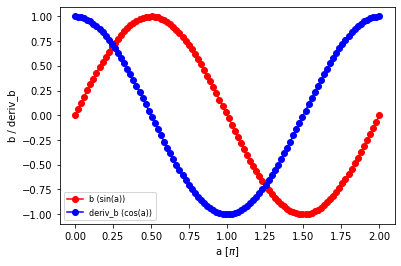

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# note: numpy and matplotlib are already included
# create list of evenly spaced numbers
a = np.linspace(0.0, 2.0*np.pi, 100)

# save the spacing in the variable 'h'; since the numbers in 'a' are evenly spaced it doesn't matter which difference we use
h = a[10] - a[9]

# create array with the sine of that numbers
b = np.sin(a)

# calculate the derivatives of the points in 'b' using the spacing 'h' and store the results in the variable 'deriv_b'
deriv_b = np.gradient(b, h)

# plot the array 'b' and its derivative 'deriv_b'
plt.plot(a/np.pi, b,       marker = 'o', color = 'red',  label = 'b (sin(a))')
plt.plot(a/np.pi, deriv_b, marker = 'o', color = 'blue', label = 'deriv_b (cos(a))')
plt.xlabel(r'a [$\pi$]')
plt.ylabel('b / deriv_b')
plt.legend(loc = 'lower left', fontsize = 8)
plt.show()

# Note: As expected, 'b' shows the sine function and its derivative 'deriv_b' is the cosine!


# Exercise 1
The purpose of this exercise is to give you a feeling of how numerical derivatives are calculated with Python.
1. Calculate the derivative of the function $f(x) = x^4 - 4x^2 + 3x - 1$ at the point $x = 1.5$ both analytically (by hand + using your calculator) and numerically (using $h/dx = 0.1$ and $h/dx = 0.01$). Compare the results. What do you expect to change when using different values for $dx$?
2. Calculate the derivative of the function $g(x) = 1/x$ at the point $x = 0.1$ both analytically (by hand + using your calculator) and numerically (using $h/dx = 0.1$). What happens?

In [ ]:
# solution to task 1

In [ ]:
# solution to task 2

# Numerical Integration

Let's assume, you want to integrate the following integral:

$\int_{a}^{b} f(x) dx$

With the linearity of the integral, you can write it as:

$\int_{a}^{b} f(x) dx = \sum_{i=0}^{N} \int_{x_i}^{x_{i+1}} f(x) dx$

where $x_i = a + ih$ and $h = (b-a)/N$. This ensures, that the $x_i$ are equally spaced.

If $x_i$ and $x_{i+1}$ are close to each other, the integral $\int_{x_i}^{x_{i+1}} f(x) dx$ can be approximated with different forms. 

## Rectangle rule

The rectangle rule is the simplest form of the integral. Each integral in the summation is approximated by a rectangle. 

$\int_{x_i}^{x_{i+1}} f(x) dx = (x_i - x_{i+1}) f(\frac{x_i + x_{i+1}}{2}) + \mathcal{O}(1/N^2)$

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Integration_rectangle.svg" alt="drawing" width="100%"/>

## Trapezoid rule

A little bit more complicated is the trapezoid rule. Each integral in the summation is approximated by a trapezoid. Notice, that we have two function evaluations instead of one with the rectangle rule.

$\int_{x_i}^{x_{i+1}} f(x) dx = (x_i - x_{i+1}) \frac{f(x_i) + f(x_{i+1})}{2} + \mathcal{O}(1/N^3)$

<img src="https://upload.wikimedia.org/wikipedia/commons/0/03/Integration_trapezoid.svg" alt="drawing" width="100%"/>

## Simpson's rule

The most complicated rule out of the three is the Simpson's rule. The function of each interval is represented by a polynomial of order 2 and integrating that polynomial instead. It's error goes with $\mathcal{O}(1/N^5)$.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Integration_simpson.svg" alt="drawing" width="100%"/>

<style>
img {
  background-color: white;
}
</style>

As you can see, the error for these methods evolve differently for different values of $N$. It's important to keep in mind, that different methods also require different numbers of function calls. So if f(x) is a very expensive function without a lot of fluctuations, it's better to use the rectangle rule, than the trapezoid rule.

There is also a way, to vary the size of the intervals, but this is a more advanced method. We will just mention it here, for you to know, that this exists. 

Also keep in mind, that the methods presented here are just the common three out of many which are optimized for different problems. 

[Source of images](https://en.wikipedia.org/wiki/Numerical_integration)



# Exercise 2

Program the rectangular and trapezoid rule in the next code block to integrate the function $f(x) = e^{-x}$ from $x=0$ to $x=1$. Compare it with the analytic result. Also vary the number of intervals and see what happens. 

In [ ]:
# your solution goes inhere. 

The Simpson's rule is quiet complicated to implement and other integration methods can be even more complicated. For that reason, clever people have already done this for us and bundled them in a library. Scipy contains a lot of methods for numerical integration. We will now take a look at some of there methods, but a full overview can be seen [here](https://docs.scipy.org/doc/scipy/reference/integrate.html).

## scipy.integrate.quad

let us first look at the quad method, which is made for directly integrating a function. It is based on the FORTRAN library QUADPACK. Scipy has generally a really good documentation we encourage you to take a look at [it](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad).

Let us first define the function we want to integrate. 

In [ ]:
import numpy as np
import scipy.integrate as integrate

def f(x):
    return np.exp(-x)

# calculate the integral of 'f' from 0 to 10
result, error = integrate.quad(f, 0, 10)

print(result, error)

0.9999546000702375 2.8326146575791917e-14


The first number gives you the result, the second one the numerical error of the integrations. 

While you use quad to integrate a function directly, there are also other algorithms implemented, which operate on arrays. One of it is the trapezoid method, you already know. As said, the input is not a function but a x, y - numpy array. 

In [ ]:
x = np.linspace(0, 100, 1000)
y = f(x)

integrate.trapezoid(y, x)

1.000834863090761

As you can see, the result is fairly similar to the quad method, but you don't have an error estimate. The last method we will be presenting here, is the simpson method, which works similar as the trapezoid method. 

In [ ]:
integrate.simpson(y, x)

1.0000402922553666

Which one you use depends one the problem you are trying to solve. While quad works just with functions and the step size is estimated on the fly, the implementation of the trapezoid and simpson method work on arrays. Keep in mind, that you can convert an array into a function and a function into an array, for that, you can check the optional section, where we talk about interpolation. 

# Exercise 3

We want to look at the function

$y(x) = \int_0^{x} e^{-a\phi^2} d\phi$

where $a$ is a positive real number. We already know, that

$\int_0^{\infty} e^{-a x^2} dx = \sqrt{\frac{\pi}{4a}}$

1. So we can use this result, to check our integration. We don't want to recompute the integral for multiple values of $a$, so first, make a substitution to eliminate $a$ in the integral and absorb it as a pre factor. 

2. Write a function, which represents the integrand and a function `y(x)` which calculates the integral. 

3. Check that everything works, by calculating `y(np.inf)`. Use $a = 10$

4. Use the previous defined x array to compute the y array. Use $a = 10$ (Hint: you need a for loop for this one)

5. Plot your result. 

In [ ]:
# definition

# double integral (dblquad)

If you want to integrate a double integral, for example the area of a circle in cartesian coordinates

$A = \int_{x=-1}^{1} \int_{y=-\sqrt{1-x^2}}^{\sqrt{1-x^2}} dy dx$

you can use `scipy.integrate.dblquad` for this. 

To understand this further, lets rewrite the integral, to make the variables match with the [documentation](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.dblquad.html#scipy.integrate.dblquad)

$\int_{x=a}^{b} \int_{y=\text{gfun}(x)}^{\text{hfun}(x)} \text{fun}(y,x) dy dx$

where:

$a = -1$  
$b = 1$  
$\text{gfun}(x) = -\sqrt{1-x^2}$  
$\text{hfun}(x) = \sqrt{1-x^2}$  
$\text{fun}(y,x) = 1$

Let's program this integral using our dblquad documentation form above

In [ ]:
a = -1
b = 1

def gfun(x):
    return -np.sqrt(1-x**2)

def hfun(x):
    return np.sqrt(1-x**2)

def fun(y, x): # the order of the arguments is important
    return 1


integrate.dblquad(fun, a, b, gfun, hfun)

(3.1415926535897984, 2.0004722323108126e-09)

And it is as easy as that! 

# Exercise 4

Using the same approach, calculate the volume of a sphere in three dimensional euclidean space and use the function [tplquad](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.tplquad.html#scipy.integrate.tplquad)

In [ ]:
# your result goes in here!

# Interpolation (optional)

Let's say, that we have two arrays with data points (y, x). We have precise values where the data points are recorded, but sometimes one wants an estimate of the values in between these data points. A process called interpolation helps us to do this. We will roughly outline interpolation and discuss it in detail in another lecture. 

Let's say, that we have the following data points:

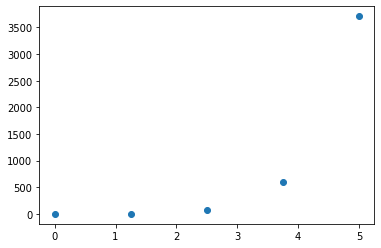

In [ ]:
x = np.linspace(0.0, 5, 5)

y = x**2*np.exp(x)

plt.scatter(x, y)

As you can see, these are singular dots. So a value of x=3 doesn't exist. The easies way to solve this, is a linear interpolation. This basically means, drawing a straight line between the points. This can be done with

In [ ]:
import scipy.interpolate as interpolate

y_linear = interpolate.interp1d(x, y)

y_linear(3)

array(284.8654386)

[scipy.interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) generates a function in the domain $(min(x), max(x))$ It easily can be understood by plotting it with a high point density, to see that it truly continuous.

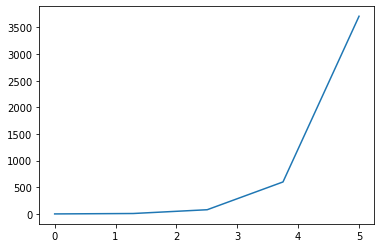

In [ ]:
x_high_density = np.linspace(0.0, 5, 10000)

plt.plot(x_high_density, y_linear(x_high_density))

There is also the possibility to use a quadratic formula for interpolation,to ensure, that the first derivative is also continuous. 

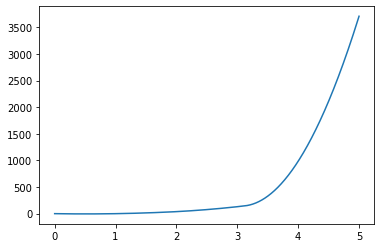

In [ ]:
y_quadric = interpolate.interp1d(x, y, kind=2)

x_high_density = np.linspace(0.0, 5, 10000)

plt.plot(x_high_density, y_quadric(x_high_density))

A nice little hack to know is, that if you function is bijective, you can calculate the inverse with the inverse interpolation. 

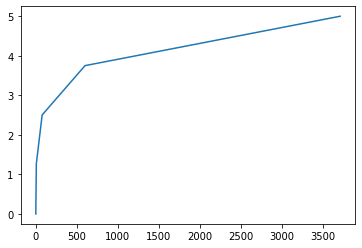

In [ ]:
y_inverse_quadric = interpolate.interp1d(y, x, kind=1) # normally it is x, y

x_inverse_high_density = np.linspace(y.min(), y.max(), 10000)

plt.plot(x_inverse_high_density, y_inverse_quadric(x_inverse_high_density))

there exist also interpolations for 'cubic', 'nearest', etc. depending on the problem you like to solve. Normally you need to experiment a little, to find the one, which fit's the best. 